In [2]:
import networkx as nx, numpy as np
import sys
sys.path.insert(0, '../')
from Models import fastIsing

g = nx.erdos_renyi_graph(10, .25)
g = nx.duplication_divergence_graph(10, .25)
# g = nx.path_graph(5)
print(g)
m = fastIsing.Ising(graph = g, magSide = 'neg', updateType = 'async')

temps = np.linspace(0, 5)
samps = m.matchMagnetization(temps)


  0%|          | 0/50 [00:00<?, ?it/s]


Computing mag per t


100%|██████████| 50/50 [00:01<00:00, 31.32it/s]


In [3]:
from matplotlib import pyplot as plt
from Toolbox import infcy
from scipy import optimize
def sig(x, a, b, c, d):
    return a / (1 + np.exp(- b * (x - c))) + d
c, v = optimize.curve_fit(sig, temps, samps[0], maxfev = int(1e6))

x0 = optimize.fsolve(lambda x: sig(x, *c) - .8, 0)
xr = np.linspace(0, temps.max(), 100)
fig, ax = plt.subplots()
ax.scatter(temps, samps[0])
ax.plot(xr, sig(xr, *c))
ax.axvline(x0)
fig.show()
m.t = x0


/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


In [4]:
deltas = 30
repeats = int(1e4)
nSamples = int(1e4)
snapshots = infcy.getSnapShots(m, nSamples = nSamples, steps = 1000)
cpx, px, mi = infcy.runMC(m, snapshots, deltas, repeats)

  0%|          | 0/157 [00:00<?, ?it/s]

done
Found 157 states
Delta =  5.90 sec
Decoding..
starting runs


100%|██████████| 157/157 [00:25<00:00,  5.96it/s]

Delta =  25.72 sec



/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """
/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


(30, 10) (10,)
0.9113103865526871 [0.09067134 0.29303841 0.08495051 0.8696517  0.08924539 0.91131039
 0.60326587 0.08811663 0.78972729 0.31433915]


/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


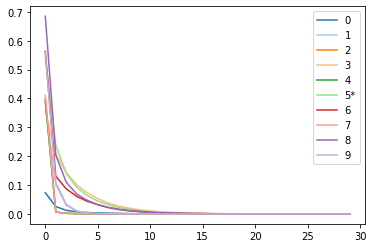

In [6]:
from Utils.plotting import fit
from Utils.stats import aucs
def dex (x,  a, b, c, d, e, f, g):
    return a + b * np.exp(- c * (x - d)) + e * np.exp(- f * (x - g))

params = dict(\
             maxfev = int(1e6),\
             bounds = (0, np.inf))
AUCS = aucs(mi.T, dex, params = params)

print(mi.shape, AUCS.shape)
node = np.argmax(AUCS)
print(AUCS[node], AUCS)


colors = plt.cm.tab20(range(m.nNodes))
fig, ax = plt.subplots()
for idx, (c, i) in enumerate(\
                             zip(colors, mi.T)):
    
    lab =  f'{m.rmapping[idx]}'
    lab += '*' if idx == node else ''
    ax.plot(i, color = c, label = lab)
ax.legend()
fig.show()

In [7]:
tmp = infcy.optimizeNudge(m, str(node), snapshots, deltas, repeats, px)
print(tmp)

  0%|          | 0/157 [00:00<?, ?it/s]

Decoding..
starting runs


100%|██████████| 157/157 [00:26<00:00,  5.59it/s]
/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.
/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.
  0%|          | 0/157 [00:00<?, ?it/s]

Delta =  26.67 sec
Decoding..
starting runs


  0%|          | 0/157 [00:00<?, ?it/s]

Delta =  26.09 sec
Decoding..
starting runs


  0%|          | 0/157 [00:00<?, ?it/s]

Delta =  27.48 sec
Decoding..
starting runs


  0%|          | 0/157 [00:00<?, ?it/s]

Delta =  27.53 sec
Decoding..
starting runs


  0%|          | 0/157 [00:00<?, ?it/s]

Delta =  28.16 sec
Decoding..
starting runs


  0%|          | 0/157 [00:00<?, ?it/s]

Delta =  27.56 sec
Decoding..
starting runs


  0%|          | 0/157 [00:00<?, ?it/s]

Delta =  28.06 sec
Decoding..
starting runs


  0%|          | 0/157 [00:00<?, ?it/s]

Delta =  27.26 sec
Decoding..
starting runs


  0%|          | 0/157 [00:00<?, ?it/s]

Delta =  27.67 sec
Decoding..
starting runs


100%|██████████| 157/157 [00:28<00:00,  5.53it/s]

Delta =  28.39 sec
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 52
{'x0': array([1.2851875]), 'coeffs': array([0.98800368, 3.39809014, 1.27804082]), 'vars': array([[ 0.00015114, -0.00151832,  0.00022943],
       [-0.00151832,  0.08683581, -0.0084128 ],
       [ 0.00022943, -0.0084128 ,  0.00151209]]), 'nudges': array([ 0.01      ,  0.02154435,  0.04641589,  0.1       ,  0.21544347,
        0.46415888,  1.        ,  2.15443469,  4.64158883, 10.        ]), 'output': array([0.00000000e+00, 1.20088135e-05, 2.18294305e-04, 1.51282142e-03,
       9.77526708e-03, 4.89109808e-02, 2.91669294e-01, 9.13346099e-01,
       9.99149902e-01, 1.00000000e+00])}


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 52
[1.2851875]


/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


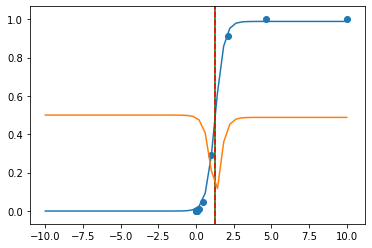

In [9]:
x, y = [tmp.get(i) for i in 'nudges output'.split()]
def sig(x, a, b, c, d):
    return a / (1 + np.exp(-b * (x - c) )) # + d
c = optimize.curve_fit(sig, x, y )[0]

x1= optimize.fmin(lambda x: abs(sig(x, *c) - .5), 0)
print(x1)
xr = np.linspace(-10, 10)
fig, ax = plt.subplots()
ax.plot(xr, sig(xr, *c))
ax.axvline(tmp.get('x0'), color = 'green')
ax.axvline(x1, color = 'red', linestyle = 'dashed')
ax.scatter(x, y)
ax.plot(xr, abs(sig(xr, *c) - .5))
fig.show()

In [10]:
# nudge = {node : tmp.get('x0')}
x0 = tmp.get('x0')
print(x0)
D = {}
for node in m.graph.nodes():
    nudge = {str(node) : x0}
    m.nudges = nudge
    cicpx, cipx, mi = infcy.runMC(m, snapshots, deltas, repeats)
    D[node] = dict(\
                  cicpx = cicpx, cipx = cipx, mi = mi,\
                  )

  0%|          | 0/157 [00:00<?, ?it/s]

[1.2851875]
Decoding..
starting runs


100%|██████████| 157/157 [00:26<00:00,  6.77it/s]
/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log2
  
/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  
  0%|          | 0/157 [00:00<?, ?it/s]

Delta =  26.55 sec
Decoding..
starting runs


  0%|          | 0/157 [00:00<?, ?it/s]

Delta =  28.59 sec
Decoding..
starting runs


  0%|          | 0/157 [00:00<?, ?it/s]

Delta =  28.01 sec
Decoding..
starting runs


  0%|          | 0/157 [00:00<?, ?it/s]

Delta =  27.16 sec
Decoding..
starting runs


  0%|          | 0/157 [00:00<?, ?it/s]

Delta =  26.09 sec
Decoding..
starting runs


  0%|          | 0/157 [00:00<?, ?it/s]

Delta =  26.39 sec
Decoding..
starting runs


  0%|          | 0/157 [00:00<?, ?it/s]

Delta =  26.26 sec
Decoding..
starting runs


  0%|          | 0/157 [00:00<?, ?it/s]

Delta =  26.03 sec
Decoding..
starting runs


  0%|          | 0/157 [00:00<?, ?it/s]

Delta =  25.95 sec
Decoding..
starting runs


100%|██████████| 157/157 [00:26<00:00,  5.90it/s]

Delta =  26.15 sec


16
(14, 10, 2) (14, 10, 2)
16
(14, 10, 2) (14, 10, 2)
16
(14, 10, 2) (14, 10, 2)
16
(14, 10, 2) (14, 10, 2)
16
(14, 10, 2) (14, 10, 2)
16
(14, 10, 2) (14, 10, 2)
16
(14, 10, 2) (14, 10, 2)
16
(14, 10, 2) (14, 10, 2)
16
(14, 10, 2) (14, 10, 2)
16
(14, 10, 2) (14, 10, 2)


/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: IntegrationWarning: The integral is probably divergent, or slowly convergent.
/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


[0.08495051 0.08811663 0.08924539 0.09067134 0.29303841 0.31433915
 0.60326587 0.78972729 0.8696517  0.91131039] [0.08563239 0.09866593 0.20711751 0.21300995 1.0982689  1.23442041
 1.61810056 2.47328545 2.9748146  3.47553581]
5 5


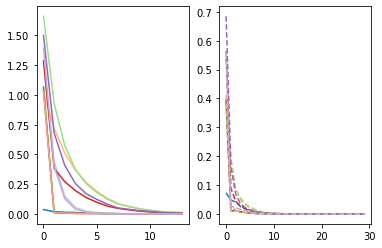

In [11]:
from Utils.stats import KL
d = np.zeros((m.nNodes))


decays = np.zeros((m.nNodes, deltas // 2 - 1))
for k, v in D.items():
#     print(k)
    cipx = v.get('cipx')
    
    print(deltas // 2 + 1)
    x = cipx[deltas // 2 + 1 : ]
    y =  px[:deltas // 2 - 1]
    print(x.shape, y.shape)
    t =  KL(x, y).sum(-1)
    decays[int(k)] = t
    


c = fit(decays, dex, params = params)[0]

CIAUCS = np.zeros((m.nNodes))
from scipy import integrate
for cidx, ci in enumerate(c):
    y = integrate.quad(lambda x: dex(x, *ci), 0, np.inf)
#     print(y)
    CIAUCS[cidx] = y[0]

fig, (ax1, ax2) = plt.subplots(1,2)

for node in range(m.nNodes):
    ax1.plot(decays[node], color = colors[node])
    ax2.plot(mi[:, node], color = colors[node], linestyle = 'dashed')
# ax.plot(decays.T)
# ax.plot(mi)
# ax1.set(xlim = (0, 3))
# ax2.set(xlim = (0,3))
fig.show()

print(np.sort(AUCS), np.sort(CIAUCS))
print(AUCS.argmax(), CIAUCS.argmax())